Import the most important libs

In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request  # for HTTP requests (web scraping, APIs)
from datetime import datetime
import os

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

Concurrency pair data are located on http://www.forextester.com/data/datasources .

You can adjust data with alpha (prediction interval) and nrow (number of rows to fetch). 

In [10]:
nrows = 10000
alpha = 0.90
concurancy_pair_path = "./EURUSD.csv"

In [38]:
pair = pd.read_csv(concurancy_pair_path,
                   nrows = 10000,
                   dtype = {'<TIME>': np.str, '<DTYYYYMMDD>': np.str}
                  )

In [39]:
pair.rename(columns={'<TICKER>': 'TICKER', 
                 '<DTYYYYMMDD>': 'DTYYYYMMDD', 
                 '<TIME>': 'TIME', 
                 '<OPEN>': 'OPEN',
                 '<HIGH>': 'HIGH',
                 '<LOW>': 'LOW',
                 '<CLOSE>': 'CLOSE',
                 '<VOL>': 'VOL'
                }, inplace=True)

In [40]:
convert_date = (lambda row: datetime.strptime(str(row['DTYYYYMMDD'])+str(row['TIME']), '%Y%m%d%H%M%S'))

In [41]:
pair['DATETIME'] = pair.apply(convert_date, axis=1)

In [42]:
pair.head(10)

,TICKER,DTYYYYMMDD,TIME,OPEN,HIGH,LOW,CLOSE,VOL,DATETIME
0,EURUSD,20010102,230100,0.9507,0.9507,0.9507,0.9507,4,2001-01-02 23:01:00
1,EURUSD,20010102,230200,0.9506,0.9506,0.9505,0.9505,4,2001-01-02 23:02:00
2,EURUSD,20010102,230300,0.9505,0.9507,0.9505,0.9506,4,2001-01-02 23:03:00
3,EURUSD,20010102,230400,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:04:00
4,EURUSD,20010102,230500,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:05:00
5,EURUSD,20010102,230600,0.9506,0.9506,0.9506,0.9506,4,2001-01-02 23:06:00
6,EURUSD,20010102,230700,0.9505,0.9507,0.9505,0.9507,4,2001-01-02 23:07:00
7,EURUSD,20010102,230800,0.9507,0.9507,0.9507,0.9507,4,2001-01-02 23:08:00
8,EURUSD,20010102,230900,0.9507,0.9507,0.9507,0.9507,4,2001-01-02 23:09:00
9,EURUSD,20010102,231000,0.9507,0.9507,0.9507,0.9507,4,2001-01-02 23:10:00


In [43]:
one_day = list(pair.groupby('DTYYYYMMDD'))[0] # fetch first day

In [44]:
last_price = float(one_day[1].tail(1).OPEN) # ostatnia cena otwarcia

In [45]:
last_date = one_day[1].tail(1).DATETIME # ostatnia data

In [46]:
alpha = 0.95

In [47]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [48]:
X = np.atleast_2d(pair.DATETIME).T
X = X.astype(np.float32)
y = pair.CLOSE

In [49]:
xx = X

In [50]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

clf.set_params(loss='ls')
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

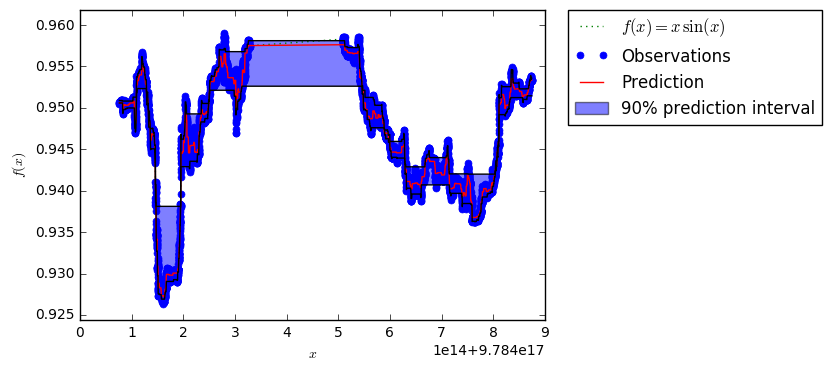

In [51]:

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, y, 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(min(y) * 0.998, max(y) * 1.003)
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()

In [52]:
back_offset = int(-1 *X.shape[0] * (1 - alpha))

In [53]:
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X[:back_offset], y[:back_offset])

# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)

clf.set_params(alpha=1.0 - alpha)
clf.fit(X[:back_offset], y[:back_offset])

# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)

clf.set_params(loss='ls')
clf.fit(X[:back_offset], y[:back_offset])

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

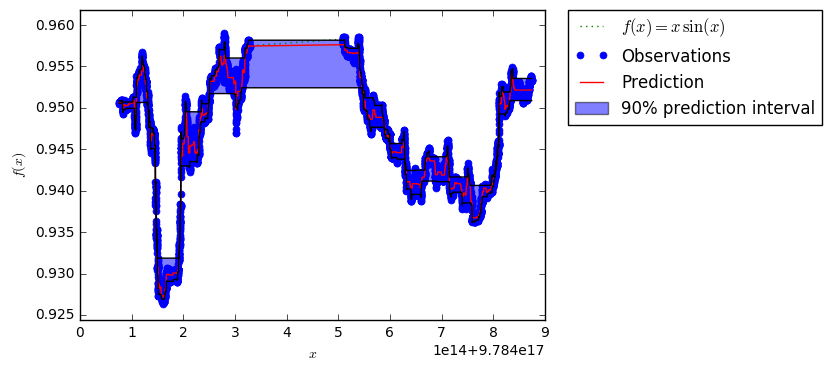

In [54]:

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, y, 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(min(y) * 0.998, max(y) * 1.003)
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()

zoom to last area

NameError: name 'x' is not defined

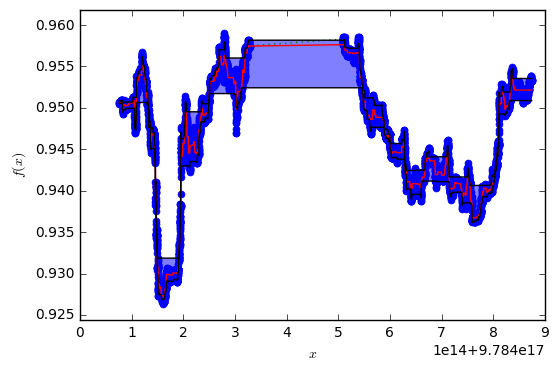

In [55]:

# Plot the function, the prediction and the 90% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, y, 'g:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(min(y) * 0.998, max(y) * 1.003)
plt.xlim(min(x), max(X))
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1))
plt.show()